# INTRODUCCIÓN #

Este es un pequeño proyecto que hice como complemento a un proyecto que estoy haciendo en Power BI. Decidí llevarlo a cabo también en Python para ver las diferencias. Personalmente creo que Python tiene más ventajas en lo que respecta a data cleaning ya que es más flexible para este fin. En cuanto a las visualizaciones de **mapas geográficos**, si bien en Python son posibles, creo que Power BI tiene mayores ventajas ya que es más intuitivo en cuanto a la creación de este tipo de gráficos. Tableau es otra herramienta muy útil para este fin.

Fuente de datos: Kaggle (https://www.kaggle.com/zynicide/wine-reviews)

En este proyecto habrá algunas visualizaciones realizadas con Plotly, una librería que permite realizar gráficos interactivos. Para poder visualizar las mismas, pueden entrar [a mi perfil de Plotly](https://chart-studio.plotly.com/~frangarlot). Están bajo el nombre "Winery Project".

In [1]:
#Importo las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)  
import cufflinks as cf
cf.go_offline()

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go

In [ ]:
tls.set_credentials_file(username= , api_key= )

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('1.1 winemag-data-130k-v2.csv') #Importo los datos

In [5]:
df.head()

,Unnamed: 0,country,points,price,province,region_1,region_2,title,variety,winery
0,0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
df['Unnamed: 0'] #Esta columna es igual al índice, por lo tanto la elimino

0              0
1              1
2              2
3              3
4              4
           ...  
129966    129966
129967    129967
129968    129968
129969    129969
129970    129970
Name: Unnamed: 0, Length: 129971, dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head()

,country,points,price,province,region_1,region_2,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   129908 non-null  object 
 1   points    129971 non-null  int64  
 2   price     120975 non-null  float64
 3   province  129908 non-null  object 
 4   region_1  108724 non-null  object 
 5   region_2  50511 non-null   object 
 6   title     129971 non-null  object 
 7   variety   129970 non-null  object 
 8   winery    129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [10]:
df.isnull().sum()  #cantidad de filas nulas por columna

country        63
points          0
price        8996
province       63
region_1    21247
region_2    79460
title           0
variety         1
winery          0
dtype: int64

In [11]:
len(df)

129971

In [12]:
#porcentaje de filas nulas por columna:

df.isnull().sum()/len(df)*100

country      0.048472
points       0.000000
price        6.921544
province     0.048472
region_1    16.347493
region_2    61.136715
title        0.000000
variety      0.000769
winery       0.000000
dtype: float64

In [13]:
df[df['country'].isnull()]

,country,points,price,province,region_1,region_2,title,variety,winery
913,NaN,87,30.0,NaN,NaN,NaN,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,83,NaN,NaN,NaN,NaN,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,88,18.0,NaN,NaN,NaN,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,92,28.0,NaN,NaN,NaN,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,89,28.0,NaN,NaN,NaN,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...
124176,NaN,90,30.0,NaN,NaN,NaN,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,89,22.0,NaN,NaN,NaN,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,89,22.0,NaN,NaN,NaN,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,90,30.0,NaN,NaN,NaN,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [14]:
#Las filas sin país con muy pocas (menos de 0,05%) y además no puedo relacionarlas con ninguna provincia ni región, así que las elimino

df = df[df['country'].notna()]

In [15]:
df.isnull().sum()

country         0
points          0
price        8992
province        0
region_1    21184
region_2    79397
title           0
variety         1
winery          0
dtype: int64

In [16]:
#otra forma de eliminar filas nulas. Hay una sóla fila en variedad de vinos que es nula así que la elimino.

df = df.dropna(subset=['variety']) 

In [17]:
df.isnull().sum()

country         0
points          0
price        8992
province        0
region_1    21183
region_2    79396
title           0
variety         0
winery          0
dtype: int64

In [18]:
df[df['province']=='Other']['country'].value_counts() 

##Hay 536 provincias que no están especificadas y clasificadas como "OTHER"(todas de Argentina) pero sí su región.

Argentina    536
Name: country, dtype: int64

In [19]:
len(df[df['region_1']=='Argentina']) ##De esas 536, 36 no tienen especificación y se clasifican como Argentina.

36

In [20]:
df[df['province']=='Other']['region_1'].value_counts()

Cafayate                    93
Salta                       89
San Juan                    73
Patagonia                   66
Calchaquí Valley            48
Neuquén                     39
Argentina                   36
Alto Valle del Río Negro    24
Río Negro Valley            20
Tulum Valley                17
La Rioja                    11
Famatina Valley             10
Zonda Valley                 3
Buenos Aires                 3
Pedernal Valley              2
Jujuy                        1
Catamarca                    1
Name: region_1, dtype: int64

In [21]:
df[df['province']=='Other']['region_2'].value_counts() #En región 2 no hay información para esos lugares

Series([], Name: region_2, dtype: int64)

In [22]:
#Voy a cambiar la clasificación OTHER por el nombre de la región 1. Voy a asignar esto a una nueva columna que se llame Región.
#Después elimino las columnas Province, region_1 y region_2.

df['Region'] = df.apply(lambda x: x['region_1'] if x['province']=='Other' else x['province'], axis=1)

In [23]:
df[df['Region']=='Other']['country'].value_counts() 

Series([], Name: country, dtype: int64)

In [24]:
df = df.drop(['province', 'region_1', 'region_2'], axis=1)

In [25]:
df.head()

,country,points,price,title,variety,winery,Region
0,Italy,87,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Sicily & Sardinia
1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro
2,US,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon
3,US,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan
4,US,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129907 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  129907 non-null  object 
 1   points   129907 non-null  int64  
 2   price    120915 non-null  float64
 3   title    129907 non-null  object 
 4   variety  129907 non-null  object 
 5   winery   129907 non-null  object 
 6   Region   129907 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.9+ MB


In [27]:
df.isnull().sum()

country       0
points        0
price      8992
title         0
variety       0
winery        0
Region        0
dtype: int64

Text(0.5, 1, 'Puntos vs Precio')

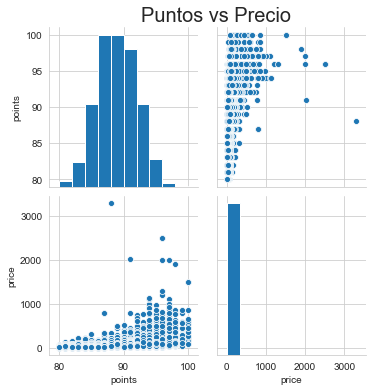

In [28]:
sns.pairplot(df) 
plt.title('Puntos vs Precio', fontdict={'fontsize': 20,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'right'} )

Text(0.5, 1.0, 'Distribución Precio')

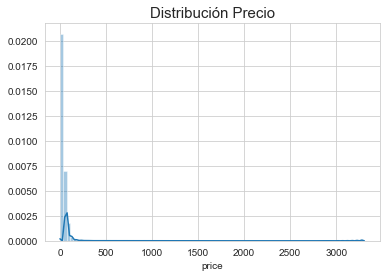

In [29]:
sns.distplot(df['price'], bins=100)
plt.title('Distribución Precio', size=15)

Mismo gráfico pero con plotly, una librería muy interesante que permite hacer gráficos interactivos. Si no pueden visualizarlo correctamente desde Github, pueden verlo en [mi perfil de Plotly](https://chart-studio.plotly.com/~frangarlot). Está bajo el nombre "Winery Project - Price Distribution" 

In [30]:
df['price'].iplot(kind='histogram', title='Price Distribution') 

[Gráfico Price Distribution en Plotly](https://chart-studio.plotly.com/~frangarlot/31)

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,129907.0,88.447051,3.040078,80.0,86.0,88.0,91.0,100.0
price,120915.0,35.368796,41.031188,4.0,17.0,25.0,42.0,3300.0


In [32]:
df.corr()

,points,price
points,1.000000,0.416197
price,0.416197,1.000000


In [33]:
len(df[df['price']>100]) / len(df) * 100

2.591084391141355

In [34]:
##Se puede concluir:

#Hay una cierta relación (lógica, pero no muy marcada) entre el precio y el puntaje del vino.

#Hay un aproximado de 2,5% de outliers en el precio del vino, con precios muy altos, 
#por eso la media es más grande que la mediana (35$ vs 25$)

In [35]:
df[df['price'].isnull()]['country'].value_counts()

France          4317
Italy           2626
Portugal         816
Austria          546
US               239
South Africa     108
Spain             72
Chile             56
Germany           45
Argentina         44
New Zealand       41
Australia         35
Israel            16
Slovenia           7
Greece             5
Brazil             5
England            5
Canada             3
Croatia            2
Georgia            2
Egypt              1
Hungary            1
Name: country, dtype: int64

Text(0.5, 1.0, 'Cantidad de vinos sin precio especificado por país')

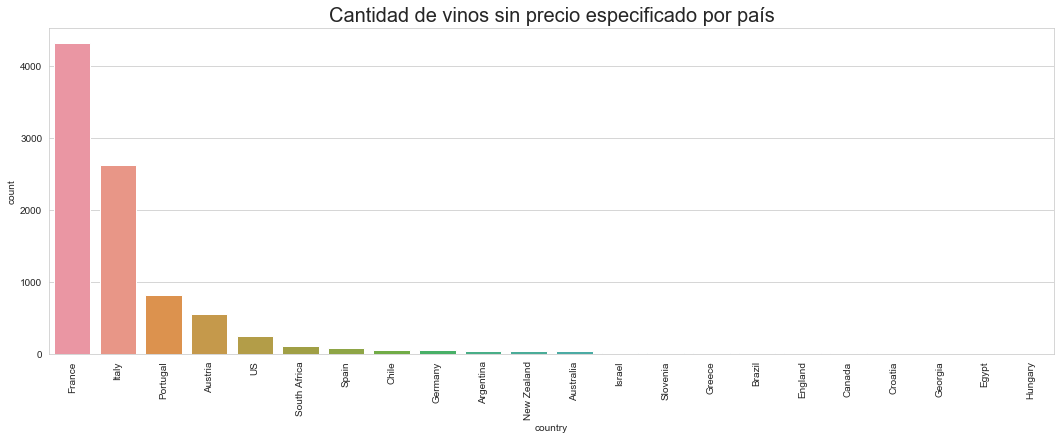

In [36]:
#Visualizo valores nulos por país

plt.figure(figsize=(18,6))
sns.countplot(data=df[df['price'].isnull()], x='country', 
              order=df[df['price'].isnull()]['country'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Cantidad de vinos sin precio especificado por país', size=20)

Text(0.5, 1.0, 'Cantidad de vinos sin precio especificado por país')

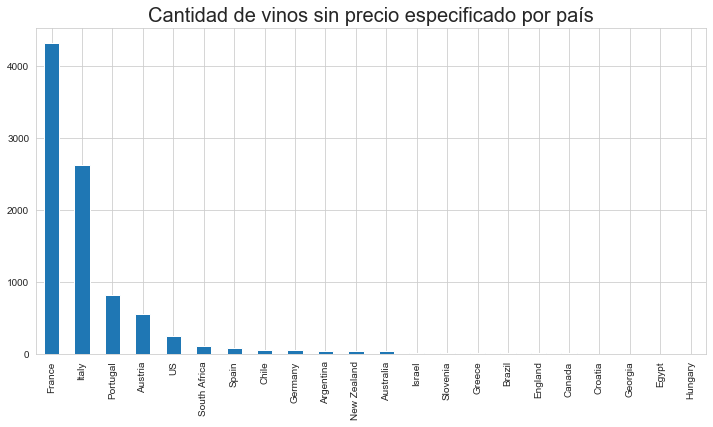

In [37]:
##Mismo gráfico pero con la librería pandas

plt.figure(figsize=(12,6))
df[df['price'].isnull()]['country'].value_counts().plot.bar() 
plt.title('Cantidad de vinos sin precio especificado por país', size=20)

In [38]:
df[df['country']=='France'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,22093.0,88.845109,3.044423,80.0,87.0,89.0,91.0,100.0
price,17776.0,41.139120,73.769404,5.0,16.0,25.0,43.0,3300.0


In [39]:
df[df['country']=='Italy'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,19540.0,88.562231,2.649756,80.0,87.0,88.0,90.0,100.0
price,16914.0,39.663770,38.052479,5.0,18.0,28.0,50.0,900.0


In [40]:
df[df['country']=='Portugal'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,5691.0,88.250220,2.996122,80.0,86.0,88.0,90.0,100.0
price,4875.0,26.218256,41.175241,5.0,12.0,16.0,28.0,1000.0


In [41]:
df[df['country']=='Austria'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,3345.0,90.101345,2.499799,82.0,88.0,90.0,92.0,98.0
price,2799.0,30.762772,27.224797,7.0,18.0,25.0,36.5,1100.0


In [42]:
df[df['country']=='US'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,54504.0,88.563720,3.114840,80.0,86.0,88.0,91.0,100.0
price,54265.0,36.573464,27.088857,4.0,20.0,30.0,45.0,2013.0


In [43]:
df[df['country']=='Australia'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,2329.0,88.580507,2.989900,80.0,87.0,89.0,91.0,100.0
price,2294.0,35.437663,49.049458,5.0,15.0,21.0,38.0,850.0


Se puede ver claramente que las medias de los precios de los países se ven afectadas por los outliers. Por lo tanto, la mediana es mucho más representativa de la realidad.

Una forma de solucionar los precios faltantes, sería asignar precios de acuerdo con la mediana correspondiente a su respectivo país. Pero como puede verse, las medianas son muy parecidas en general entre todos los países (alrededor de 25 $). Por lo tanto, es más práctico usar la mediana general de todo el dataset que es de 25. 

De esta forma también evitamos otros problemas como asignar una mediana errónea, por ejemplo, en casos en el que un país solamente tenga 1 vino con precio listado y éste sea un outlier. También evitamos el problema de que todos los vinos de ese país no estén listados con precios y por ende no tengan mediana.

Text(0.5, 1.0, 'Mediana de precio por país')

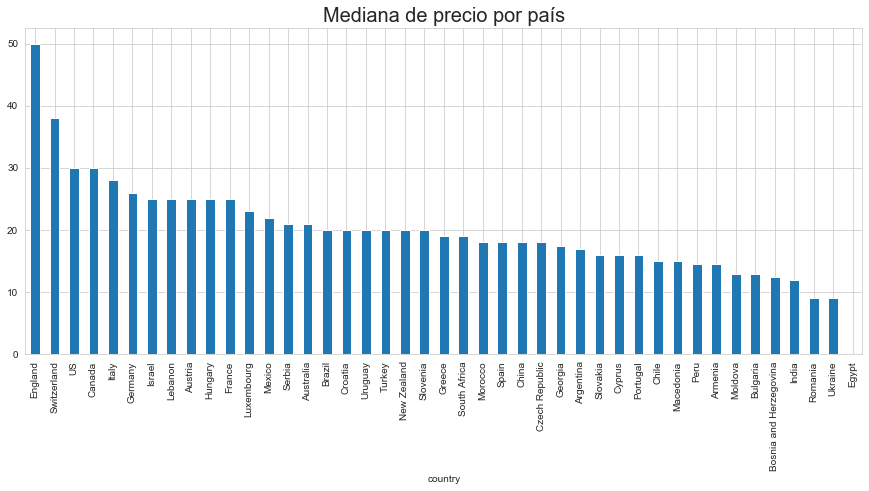

In [44]:
plt.figure(figsize=(15,6))
df.groupby(by='country').median()['price'].sort_values(ascending=False).plot.bar()
plt.title('Mediana de precio por país', size=20)

In [45]:
len(df[df['country']=='England']) / len(df) * 100    #porcentaje de vinos correspondientes a Inglaterra con respecto al total

0.05696382796923954

In [46]:
len(df[df['country']=='Switzerland']) / len(df) * 100

0.005388470213306442

In [47]:
len(df[df['country']=='Chile']) / len(df) * 100

3.441692903384729

In [48]:
len(df[df['country']=='Bulgaria']) / len(df) * 100

0.10853918572517263

Podemos ver que, si bien en el gráfico se captan algunas medianas de precios bastante más altas que 25, como Inglaterra con una mediana de 50  o Chile de 15, las cantidades de vinos correspondientes a esos países son muy pequeñas con respecto al total. Por lo tanto, se puede usar sin problemas la mediana general del dataset (25).

In [49]:
df['price'].median()

25.0

In [50]:
df.isnull().sum()

country       0
points        0
price      8992
title         0
variety       0
winery        0
Region        0
dtype: int64

In [51]:
df['price'] = df['price'].apply(lambda x: df['price'].median() if np.isnan(x) else x)

In [52]:
df.isnull().sum()

country    0
points     0
price      0
title      0
variety    0
winery     0
Region     0
dtype: int64

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,129907.0,88.447051,3.040078,80.0,86.0,88.0,91.0,100.0
price,129907.0,34.651081,39.673045,4.0,18.0,25.0,40.0,3300.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129907 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  129907 non-null  object 
 1   points   129907 non-null  int64  
 2   price    129907 non-null  float64
 3   title    129907 non-null  object 
 4   variety  129907 non-null  object 
 5   winery   129907 non-null  object 
 6   Region   129907 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 12.9+ MB


In [55]:
df.head()

,country,points,price,title,variety,winery,Region
0,Italy,87,25.0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Sicily & Sardinia
1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro
2,US,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon
3,US,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan
4,US,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon


En Power BI me figura error en la fila 18872 (tomando como source el mismo archivo CSV que estoy usando ahora en Python). Voy a encontrar dicha fila:

In [56]:
df.loc[18872]

country                                               France
points                                                    90
price                                                     17
title      Château Grand Moulin 2010  Blaye Côtes de Bord...
variety                             Bordeaux-style Red Blend
winery                                  Château Grand Moulin
Region                                              Bordeaux
Name: 18872, dtype: object

In [57]:
df[(df['variety']=='Bordeaux-style Red Blend')  & (df['price']==17) & (df['winery']=='Château Grand Moulin')]

,country,points,price,title,variety,winery,Region
18872,France,90,17.0,Château Grand Moulin 2010 Blaye Côtes de Bord...,Bordeaux-style Red Blend,Château Grand Moulin,Bordeaux


No hay ningún problema con esta fila, voy a exportar esta tabla **df** como CSV y usarlo en Power BI para ver si así continúa el error.

In [58]:
pwd

'C:\\Users\\Francisco\\Documents\\Fran\\2020\\Edx\\Power Bi\\Week 1'

In [ ]:
df.to_csv('C:\\Users\\Francisco\\Documents\\Fran\\2020\\Edx\\Power Bi\Winery Data Cleaned with Python.csv')

In [137]:
#Sólo por curiosidad:

df.to_excel('C:\\Users\\Francisco\\Documents\\Fran\\2020\\Edx\\Power Bi\Winery Data Cleaned with Python.xlsx')

# Un poco de análisis#

**¿Qué países tienen mayor puntaje? ¿Cuáles tienen vinos más costosos?**

In [59]:
df.groupby(by='country').mean().sort_values(by='points', ascending=False)  

#Países con sus respectivas medias de puntos y precios de vinos. Ordenados en orden descendente de puntaje. 

,points,price
country,,
England,91.581081,49.878378
India,90.222222,13.333333
Austria,90.101345,29.822123
Germany,89.851732,41.898845
Canada,89.369650,35.587549
Hungary,89.191781,40.541096
China,89.000000,18.000000
France,88.845109,37.985516
Luxembourg,88.666667,23.333333


Text(0.5, 1.0, 'Puntaje promedio de vinos por país')

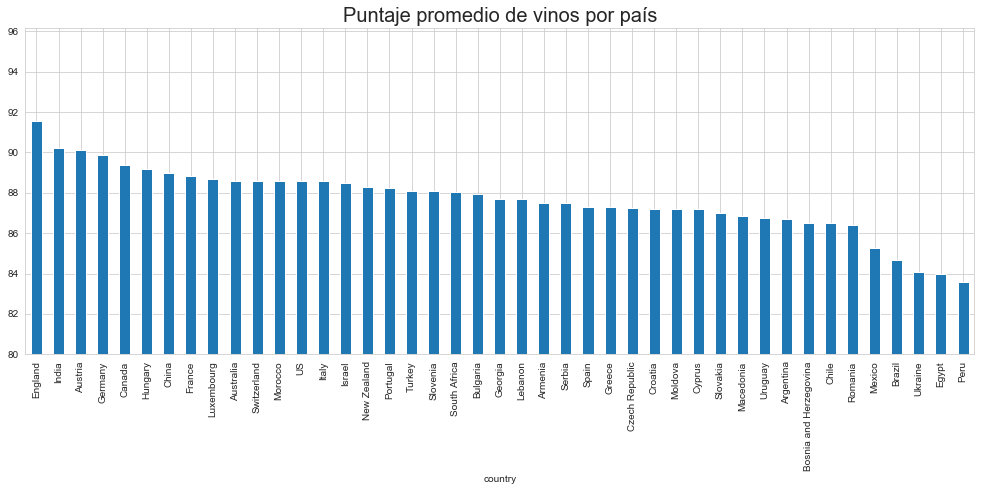

In [60]:
plt.figure(figsize=(17,6))
df.groupby(by='country').mean().sort_values(by='points', ascending=False)['points'].plot.bar()

plt.ylim(bottom=80)
plt.title('Puntaje promedio de vinos por país', size=20)

#Se puede observar que Inglaterra (91,58 pts) tiene el mayor puntaje promedio y Perú (83,56 pts) el menor. 
#Cabe destacar que la escala va de 1 a 100 pts, por lo que en realidad todos los países analizados tienen puntajes bastante altos.

In [61]:
df.groupby(by='country').mean().sort_values(by='price', ascending=False).head() #ahora ordenamos por precio

,points,price
country,,
Switzerland,88.571429,85.285714
England,91.581081,49.878378
Germany,89.851732,41.898845
Hungary,89.191781,40.541096
France,88.845109,37.985516


Text(0.5, 1.0, 'Precio promedio de vinos por país')

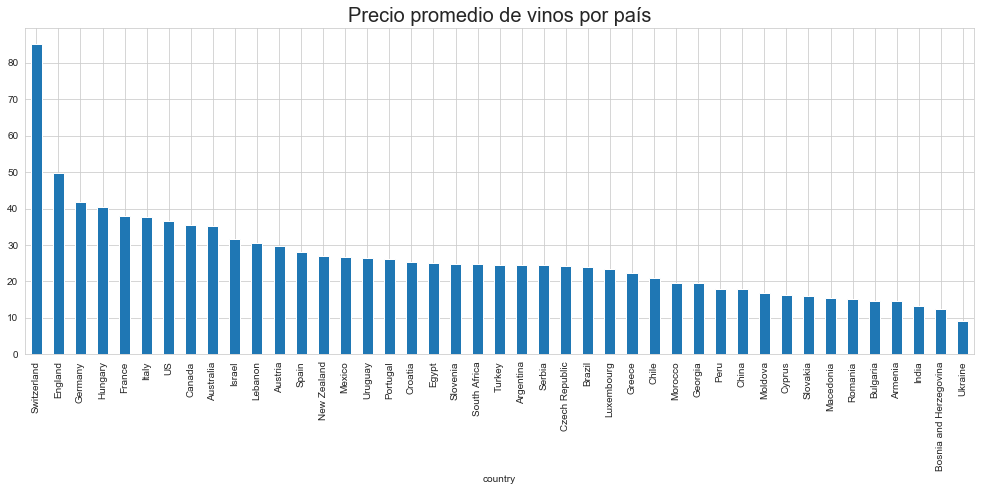

In [62]:
plt.figure(figsize=(17,6))
df.groupby(by='country').mean().sort_values(by='price', ascending=False)['price'].plot.bar()

plt.title('Precio promedio de vinos por país', size=20)

#Suiza tiene una gran diferencia de precios con respecto al resto

Text(0.5, 1.0, 'Cantidad de vinos analizados por país')

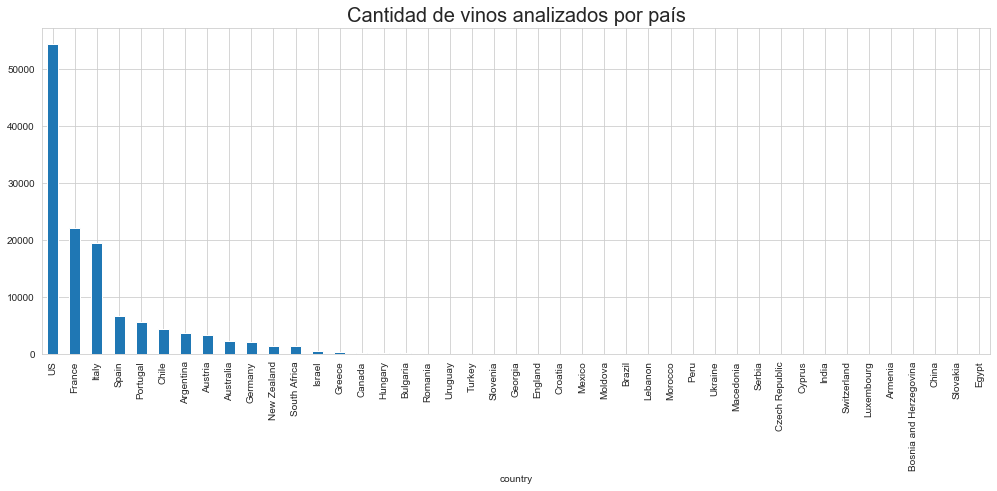

In [67]:
plt.figure(figsize=(17,6))
df.groupby(by='country').count().sort_values(by='winery', ascending=False)['winery'] .plot.bar()

plt.title('Cantidad de vinos analizados por país', size = 20)

#Esto se debe a que Suiza tiene sólo 7 vinos (tabla más abajo) en el análisis y son de un precio alto con respecto a la media.

Comparemos puntos y precio con respecto a la cantidad de vinos por país

In [68]:
count_wines = df.groupby(by='country').count()['winery']

comparition_table = df.groupby(by='country').mean().sort_values(by='points', ascending=False) 

comparition_table = comparition_table.join(count_wines,how='inner')

comparition_table.rename(columns= {'winery':'Cantidad', 'points':'Puntos', 'price':'Precio'}, inplace=True)

comparition_table.rename(index= {'England':'United Kingdom'}, inplace=True)  
#Cambio "England" por "United Kingdom" porque Plotly no reconoce "England" en el mapa geográfico.

comparition_table = comparition_table.sort_values(by='Precio', ascending=False)

comparition_table

,Puntos,Precio,Cantidad
country,,,
Switzerland,88.571429,85.285714,7
United Kingdom,91.581081,49.878378,74
Germany,89.851732,41.898845,2165
Hungary,89.191781,40.541096,146
France,88.845109,37.985516,22093
Italy,88.562231,37.693091,19540
US,88.563720,36.522714,54504
Canada,89.369650,35.587549,257
Australia,88.580507,35.280807,2329


## Vamos a graficar estas comparaciones en un mapa ##

Estos mapas son realizados con Plotly, para poder verlos pueden ingresar [a mi perfil de Plotly](https://chart-studio.plotly.com/~frangarlot). Están bajo el nombre "Winery Project". Son mapas interactivos en los que se puede hacer zoom y ver información detallada de cada país.

### Puntos promedio por país ###

In [69]:
#código para generar el mapa:

data = dict(type='choropleth',
            colorscale='BrBG_r',
            reversescale = True,
            locations = comparition_table.reset_index()['country'],
            locationmode='country names',
            z = comparition_table.reset_index()['Puntos'],
            text = comparition_table.reset_index()['country'],
            colorbar = {'title':"Average Points"}
            )


layout = dict(
              title = "Average Points per Country",
              geo = dict(
                         showframe = False,
                         projection = {'type':'mercator'}
                         )
             )

In [292]:
choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap, filename='0. Winery Project - Average Points per Country')

[Mapa Puntos Promedio por País](https://chart-studio.plotly.com/~frangarlot/43)

### Precio promedio por país ###

In [70]:
#código para generar el mapa:

data = dict(type='choropleth',
            colorscale='viridis',
            reversescale = True,
            locations = comparition_table.reset_index()['country'],
            locationmode='country names',
            z = comparition_table.reset_index()['Precio'],
            text = comparition_table.reset_index()['country'],
            colorbar = {'title':"Average Price"}
            )


layout = dict(
              title = "Average Price per Country",
              geo = dict(
                         showframe = False,
                         projection = {'type':'mercator'}
                         )
             )

In [295]:
choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap, filename='0. Winery Project - Average Price per Country')

[Mapa Precios Promedio por País](https://chart-studio.plotly.com/~frangarlot/45)

## Cantidad de vinos analizados por país ##

En este mapa se ve claramente que los países con mayor cantidad de vinos tomados en el análisis son: Estados Unidos, con la mayor cantidad (54504 vinos), seguido por Francia (22093 vinos) e Italia (19540 vinos). Estados Unidos contiene más del 40 % de los vinos analizados. 

In [71]:
#código para generar el mapa:a

data = dict(type='choropleth',
            colorscale='viridis',
            reversescale = True,
            locations = comparition_table.reset_index()['country'],
            locationmode='country names',
            z = comparition_table.reset_index()['Cantidad'],
            text = comparition_table.reset_index()['country'],
            colorbar = {'title':"Quantity"}
            )


layout = dict(
              title = "Amount of Wines per Country",
              geo = dict(
                         showframe = False,
                         projection = {'type':'mercator'}
                         )
             )

In [298]:
choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap, filename='0. Winery Project - Amount of Wines per Country')

[Mapa Cantidad de Vinos Analizados por País](https://chart-studio.plotly.com/~frangarlot/47)

**Vamos a analizar el caso de Estados Unidos**

In [72]:
usa = pd.DataFrame(df[df['country']=='US']['Region'].value_counts().reset_index())
usa.rename(columns={'index': 'Region', 'Region':'Quantity'}, inplace=True)


In [73]:
def change_name(x,y):
    if y < 700:
        return 'Other'
    else:
        return x

In [74]:
usa['Region'] = usa.apply(lambda x: change_name(x['Region'], x['Quantity']), axis=1)


In [75]:
usa = usa.groupby('Region').sum().sort_values(by='Quantity', ascending=False)

Text(0.5, 1.0, 'Cantidad de vinos por región en Estados Unidos')

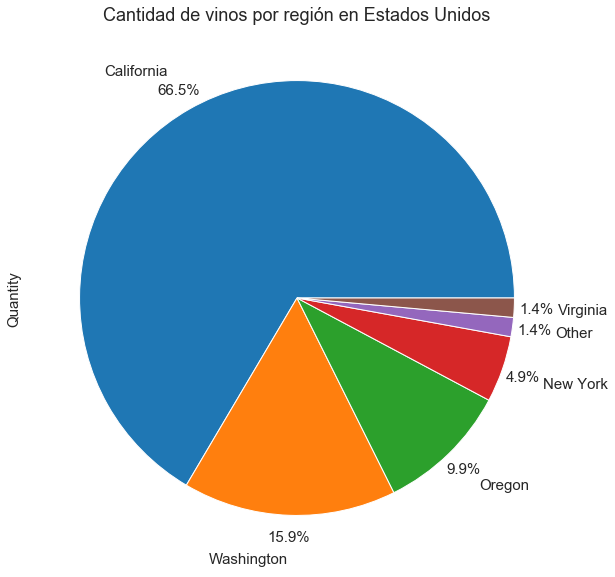

In [77]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(10,10))
usa['Quantity'].plot.pie(autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Cantidad de vinos por región en Estados Unidos')

Más del 66% de todos los vinos analizados de USA corresponden a California

## ¿Qué variedades de vinos son las más costosas? (En todo el dataset) ##

Text(0.5, 1.0, 'Variedades de vino más costosas en el dataset completo')

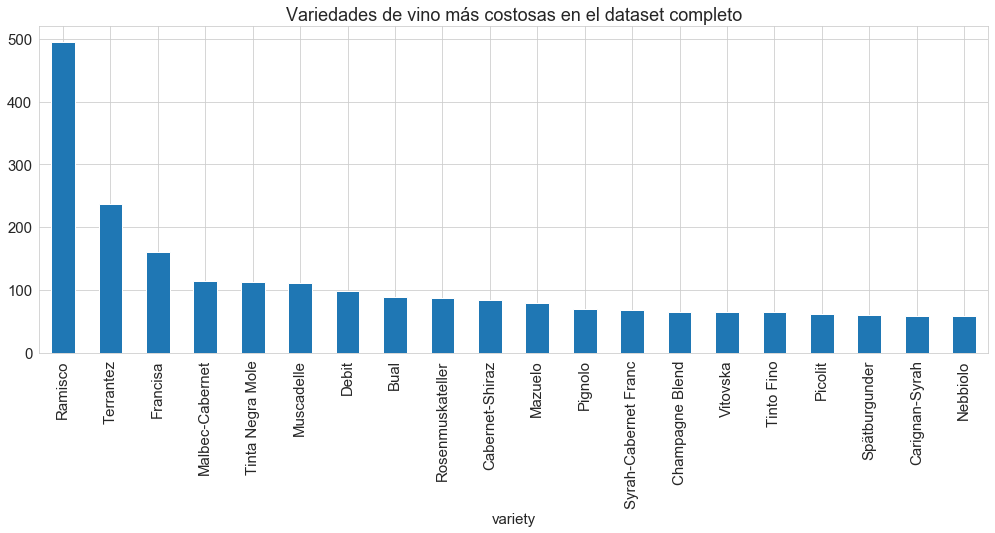

In [78]:
plt.figure(figsize=(17,6))
df.groupby(by='variety').mean()['price'].sort_values(ascending=False).head(20).plot.bar()

plt.title('Variedades de vino más costosas en el dataset completo')

**¿Y en Estados Unidos? Dado que es el país con mayor cantidad de vinos en análisis**

Text(0.5, 1.0, 'Variedades de vino más costosas en Estados Unidos')

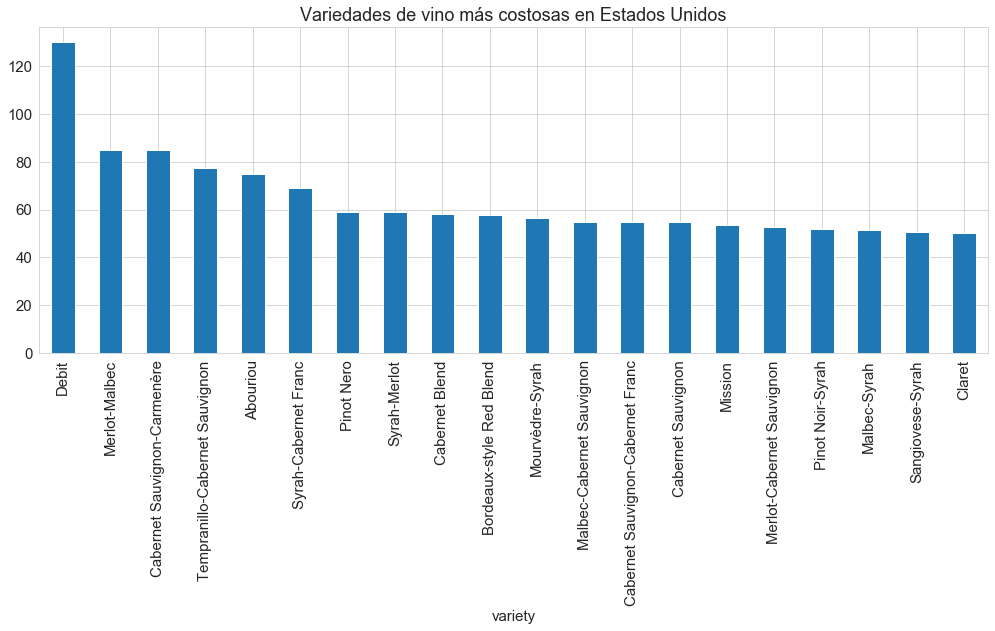

In [79]:
plt.figure(figsize=(17,6))
df[df['country']=='US'].groupby(by='variety').mean()['price'].sort_values(ascending=False).head(20).plot.bar()
plt.title('Variedades de vino más costosas en Estados Unidos')

## ¡Eso es todo! ##